### Import Modules

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import pandas as pd
import re

### Import data from Excel

In [2]:
df_bang = pd.read_excel('data/vito/Bangladesh SDG Dataset.xlsx',sheet_name='bangladesh.reduced')
df_bang['country'] = 'Bangladesh'

df_eth = pd.read_excel('data/vito/Ethiopia SDG Dataset.xlsx',sheet_name='ethiopia.reduced')
df_eth['country'] = 'Ethiopia'

df_tanz = pd.read_excel('data/vito/Tanzania SDG Dataset.xlsx',sheet_name='tanzania.reduced')
df_tanz['country'] = 'Tanzania'

df_laos = pd.read_excel('data/vito/Laos SDG Dataset.xlsx',sheet_name='laos.reduced')
df_laos['country'] = 'Lao PDR'

In [3]:
df_all = pd.concat([df_bang,df_eth,df_tanz,df_laos],sort=False).set_index(['country','year'])

# select only columns that appear in all reduced datasets - inner join
df_common = pd.concat([df_bang,df_eth,df_tanz,df_laos],join='inner',sort=False).set_index(['country','year'])

### Add in *CO2 per capita* from external source

In [4]:
df_co2 = pd.read_csv('data/new/OWiD_co2-emissions-per-capita.csv')
# rename Laos
df_co2['Entity'][df_co2['Code']=='LAO'] = 'Lao PDR'

# get subset of CO2 data
co2_series = df_co2[df_co2['Entity'].isin(['Bangladesh','Tanzania','Ethiopia','Lao PDR'])&(df_co2['Year']>=2000)].set_index(['Entity','Year']).iloc[:,1]
# insert into dataframe
df_common.insert(0,'CO2pc',co2_series)

df_common.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


CO2pc  1.4.1.SP_ACS_BSRVH2O.ALLAREA.BOTHSEX.ALLAGE  \
country    year                                                          
Bangladesh 2000  0.209034                                     95.21504   
           2001  0.238197                                     95.38698   
           2002  0.242937                                     95.56340   
           2003  0.252776                                     95.73788   
           2004  0.262986                                     95.91029   

                 1.4.1.SP_ACS_BSRVSAN.ALLAREA.BOTHSEX.ALLAGE  \
country    year                                                
Bangladesh 2000                                     25.64404   
           2001                                     26.97425   
           2002                                     28.33348   
           2003                                     29.68813   
           2004                                     31.03777   

                 1.4.1.SP_ACS_BSRVH2O.RURAL.BOTHSEX.ALLAGE  \
country    year                                              
Bangladesh 2000                                   94.15292   
           2001                                   94.34690   
           2002                                   94.54088   
           2003                                   94.73486   
           2004                                   94.92883   

                 1.4.1.SP_ACS_BSRVSAN.RURAL.BOTHSEX.ALLAGE  \
country    year                                              
Bangladesh 2000                                   20.06339   
           2001                                   21.40944   
           2002                                   22.75549   
           2003                                   24.10154   
           2004                                   25.44759   

                 1.4.1.SP_ACS_BSRVH2O.URBAN.BOTHSEX.ALLAGE  \
country    year                                              
Bangladesh 2000                                   98.65534   
           2001                                   98.66331   
           2002                                   98.67127   
           2003                                   98.67924   
           2004                                   98.68721   

                 1.4.1.SP_ACS_BSRVSAN.URBAN.BOTHSEX.ALLAGE  \
country    year                                              
Bangladesh 2000                                   43.72024   
           2001                                   44.50379   
           2002                                   45.28734   
           2003                                   46.07088   
           2004                                   46.85443   

                 2.a.2.DC_TOF_AGRL.ALLAREA.BOTHSEX.ALLAGE  \
country    year                                             
Bangladesh 2000                                 333.55356   
           2001                                  99.81012   
           2002                                  76.38967   
           2003                                  76.10395   
           2004                                  63.49149   

                 2.1.1.SN_ITK_DEFC.ALLAREA.BOTHSEX.ALLAGE  \
country    year                                             
Bangladesh 2000                                      20.8   
           2001                                      18.7   
           2002                                      18.2   
           2003                                      17.5   
           2004                                      17.1   

                 2.1.1.SN_ITK_DEFCN.ALLAREA.BOTHSEX.ALLAGE  \
country    year                                              
Bangladesh 2000                                       27.3   
           2001                                       25.1   
           2002                                       24.8   
           2003                                       24.4   
           2004                                       24.1   

                     

### Write to file to be used in R

In [5]:
df_common.to_csv('outputs/data/vito_reduced_common.csv')

### Some exploration

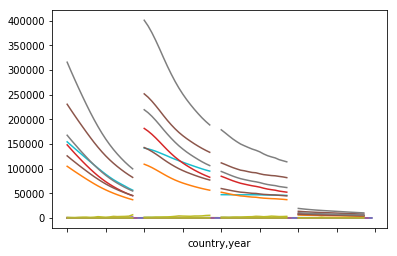

In [6]:
df_common.plot(legend=False)
plt.show()

### Use Regular Expressions to extract goal numbers from target names

In [7]:
# example
df_all.columns[0]

'1.4.1.SP_ACS_BSRVH2O.ALLAREA.BOTHSEX.ALLAGE'

In [8]:
goal_numbers_all = set() # to store ints of the goal number
for label in df_all.columns:
    goal_numbers_all.add(int(re.match(r'^([0-9]*)\.',label).groups()[0]))

goal_numbers_common = set() # to store ints of the goal number
for label in df_common.columns[1:]:
    goal_numbers_common.add(int(re.match(r'^([0-9]*)\.',label).groups()[0]))
    
print('All: ',goal_numbers_all)
print('Common: ',goal_numbers_common)
print('Diff: ',goal_numbers_all-goal_numbers_common)

All:  {1, 2, 3, 5, 6, 7, 8, 9, 10, 14, 15, 17}
Common:  {1, 2, 3, 5, 6, 7, 8, 9, 10, 15, 17}
Diff:  {14}
